In [10]:
using Distributions
using Plots; pyplot();
using StatsBase

In [54]:
p = Distributions.Poisson(5.)

Distributions.Poisson{Float64}(λ=5.0)

In [55]:
rgd = rand(p, 10000);

In [56]:
h = Histogram(0:1:20, :left);
append!(h, rgd);

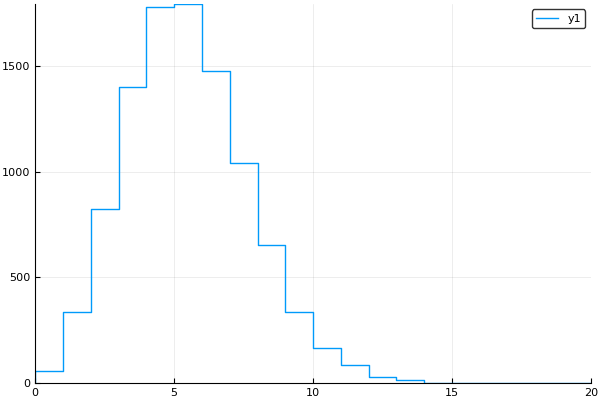

In [57]:
plot(h, st=:step)

In [70]:
model_func(x::Float64, par::Array{Float64, 1}) = sin(par[1] * ( x - par[2]));

In [ ]:
function test_statistic_loglikelihood(x::Array{Float64, 1}, )::Float64
    
end

In [138]:
ps_A = collect(0:0.1:1);
ps_E = collect(0:0.2:3);
energies = collect(0:0.5:4);
n_samples = 1000;
n_trials = fill(100, length(energies));

lllhs = zeros(Float64, n_samples, length(ps_E), length(ps_A));

In [139]:
for ia in eachindex(ps_A)
    a = ps_A[ia]
    for ie in eachindex(ps_E)
        e = ps_E[ie]
        for is in 1:n_samples
            lllh = one(Float64)
            for ix in eachindex(energies)
                nu_guess_from_model = Int(round(model_func(energies[ix], [a, e])*n_trials[ix], 0))
                if nu_guess_from_model < 0 continue end
                random_sample = rand(Distributions.Poisson(nu_guess_from_model))
                lllh *= Distributions.pdf(Distributions.Poisson(nu_guess_from_model), random_sample)
            end
            lllhs[is, ie, ia] = lllh
        end
    end
end

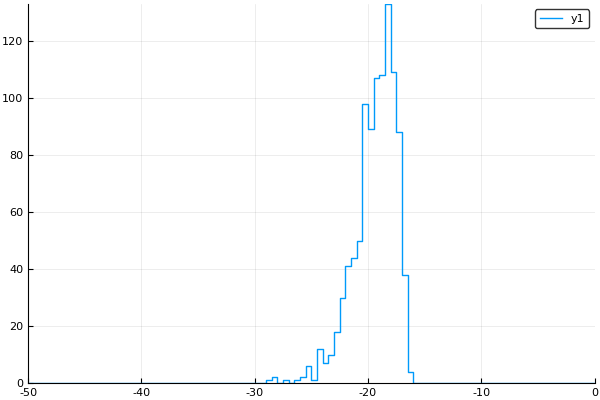

In [145]:
h = Histogram(-50:0.5:0, :right)
append!(h, log.(lllhs[:, 4, 2]))
# h = fit(Histogram, log.(lllhs[:, 2, 2]), nbins=50, closed=:left);
plot(h, st=:step)